In [251]:
# Directory
import os
os.getcwd() # Check
os.chdir('C:/Users/jdavo/OneDrive/Documents/Datasets/Industrial Safety') # Use forward slashes
os.getcwd() # Validate

'C:\\Users\\jdavo\\OneDrive\\Documents\\Datasets\\Industrial Safety'

In [189]:
import pandas as pd
data = pd.read_csv('isahd.csv')
del data['Unnamed: 0']

In [190]:
# Data Exploration:
data.columns

Index(['Data', 'Countries', 'Local', 'Industry Sector', 'Accident Level',
       'Potential Accident Level', 'Genre', 'Employee or Third Party',
       'Critical Risk', 'Description'],
      dtype='object')

In [5]:
data.head()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [6]:
data.tail()

,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
420,2017-07-04 00:00:00,Country_01,Local_04,Mining,I,III,Male,Third Party,Others,"Being approximately 5:00 a.m. approximately, w..."
421,2017-07-04 00:00:00,Country_01,Local_03,Mining,I,II,Female,Employee,Others,The collaborator moved from the infrastructure...
422,2017-07-05 00:00:00,Country_02,Local_09,Metals,I,II,Male,Employee,Venomous Animals,During the environmental monitoring activity i...
423,2017-07-06 00:00:00,Country_02,Local_05,Metals,I,II,Male,Employee,Cut,The Employee performed the activity of strippi...
424,2017-07-09 00:00:00,Country_01,Local_04,Mining,I,II,Female,Third Party,Fall prevention (same level),"At 10:00 a.m., when the assistant cleaned the ..."


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 10 columns):
Data                        425 non-null object
Countries                   425 non-null object
Local                       425 non-null object
Industry Sector             425 non-null object
Accident Level              425 non-null object
Potential Accident Level    425 non-null object
Genre                       425 non-null object
Employee or Third Party     425 non-null object
Critical Risk               425 non-null object
Description                 425 non-null object
dtypes: object(10)
memory usage: 33.3+ KB


In [252]:
catcols = ['Countries', 'Potential Accident Level', 'Accident Level', 'Critical Risk', 'Industry Sector','Local', 'Genre', 'Employee or Third Party']
for cols in catcols:
    data[cols] = data[cols].astype('category')
data.Data = pd.to_datetime(data.Data, format='%Y-%m-%d %H:%M:%S')
data.info()

KeyError: 'Countries'

In [194]:
# Import NLP tools:
from nltk.stem import WordNetLemmatizer
import re
from nltk.corpus import stopwords

# Preprocessing Set up:
stop_words = set(stopwords.words('english'))
r = {}
k = {}

# Body:
for d in range(len(data)):
    bs = data['Description'][d].split(' ')
    for b in bs:
        b = re.sub('[^a-zA-Z0-9]', '', b).lower().strip() # Take out special characters in words
        lemmatizer = WordNetLemmatizer()
        lemb = lemmatizer.lemmatize(b) # Word Lemmatizing
        if lemb in stop_words:
            pass
        if lemb not in stop_words:
            if lemb in r.keys():
                r[lemb] += 1
            elif lemb not in r.keys():
                r[lemb] = 1     
    k[d] = r
    r = {}
    
# Output:
word_set = pd.DataFrame(k).transpose()
data = pd.concat([data.loc[:,['Accident Level', 'Potential Accident Level']], word_set], axis=1, join='inner')
del data['']

In [195]:
import matplotlib.pyplot as plt
data.plot(kind='bar', x = 'Accident Level', y = count('xray'))
plt.show()

NameError: name 'count' is not defined

In [200]:
AL = data.groupby('Accident Level').sum()
PAL = data.groupby('Potential Accident Level').sum()
AL.loc['V', :].sort_values(ascending=False)

wa                13.0
operator           8.0
scoop              6.0
approximately      5.0
mixkret            5.0
mr                 5.0
left               5.0
height             4.0
side               4.0
shotcrete          4.0
inside             4.0
accident           4.0
time               4.0
pm                 3.0
right              3.0
collaborator       3.0
nv                 3.0
mechanic           3.0
team               3.0
find               3.0
equipment          3.0
x                  3.0
work               3.0
floor              3.0
visualizes         2.0
activated          2.0
activity           2.0
075                2.0
danon              2.0
verify             2.0
                  ... 
workermechanic     NaN
working            NaN
workplace          NaN
workshop           NaN
worn               NaN
would              NaN
wound              NaN
wounding           NaN
wrench             NaN
wrist              NaN
x3                 NaN
x32                NaN
x40cm      

In [217]:
import nltk
#nltk.FreqDist(AL.loc['I',:]).plot()
AL.index[0]

'I'

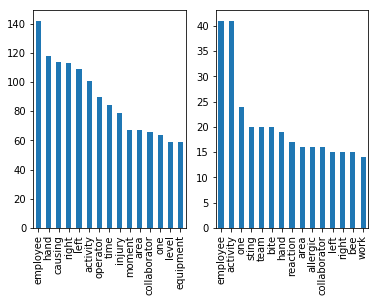

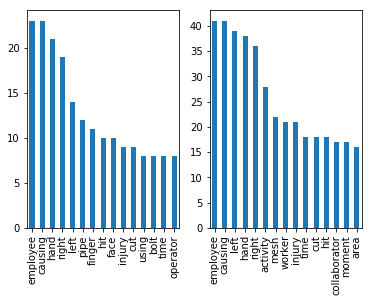

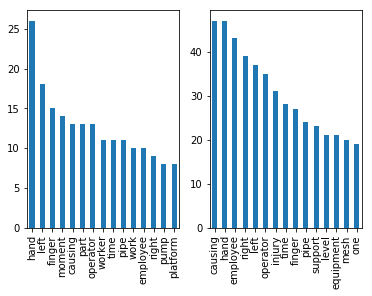

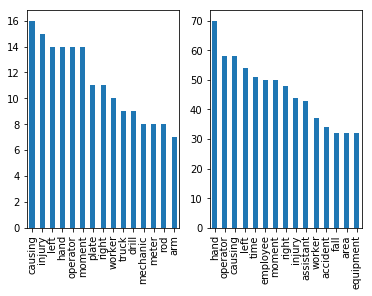

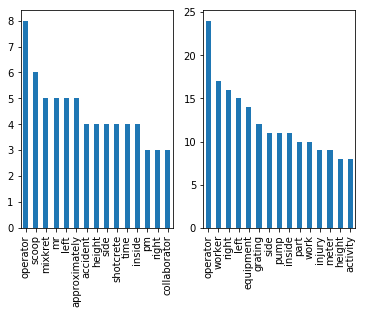

In [246]:
#fig, axes = plt.subplots(nrows=5, ncols=2)
for i in range(len(AL.index)):
    plt.figure(i)
    plt.subplot(1, 2, 1)
    AL.iloc[i,:].sort_values(ascending=False).iloc[:15].plot(kind='bar')
    plt.subplot(1, 2, 2)
    PAL.iloc[i,:].sort_values(ascending=False).iloc[:15].plot(kind='bar')
    plt.show()

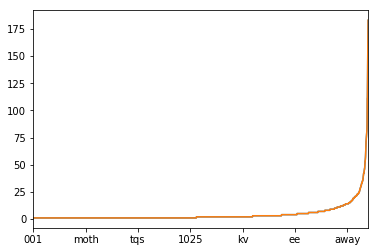

In [255]:
AL.sum().sort_values().plot()
plt.show()

In [ ]:
nltk.FreqDist()